In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

data = pd.read_csv('/Users/andreihauryk/Desktop/dataset_2.csv', index_col = 0)
data.head()

,67952,1
67900,,
67908,68068,1
67912,68036,1
67940,67928,1
67940,67928,1
67940,67928,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11204 entries, 67908 to 67208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   67952   11204 non-null  int64
 1   1       11204 non-null  int64
dtypes: int64(2)
memory usage: 262.6 KB


In [3]:
data.isnull().any()

67952    False
1        False
dtype: bool

In [4]:
data.shape

(11204, 2)

In [5]:
temp_data = data['1']
data_x = data.copy()
data_x = data_x.drop('1', axis =1)
X = data_x
print("    __X__")
X.head()

    __X__


,67952
67900,
67908,68068
67912,68036
67940,67928
67940,67928
67940,67928


In [6]:
le = LabelEncoder()

temp_data = le.fit_transform(temp_data)
Y = temp_data
print("__Y__")
Y

__Y__


array([1, 1, 1, ..., 1, 1, 1])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)


print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)


Training split input-  (8963, 1)
Testing split input-  (2241, 1)


In [8]:
decision_tree=DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree.score(x_test,y_test)))



Accurancy on training set: 0.987839
Accurancy on test set: 0.987059


[Text(472.15384615384613, 978.48, '67952 <= 66218.0\ngini = 0.5\nsamples = 8963\nvalue = [4513, 4450]\nclass = pc'),
 Text(171.69230769230768, 761.0400000000001, '67952 <= 66150.0\ngini = 0.0915\nsamples = 4243\nvalue = [204, 4039]\nclass = target'),
 Text(85.84615384615384, 543.6, 'gini = 0.0\nsamples = 1998\nvalue = [0, 1998]\nclass = target'),
 Text(257.53846153846155, 543.6, '67952 <= 66184.0\ngini = 0.1652\nsamples = 2245\nvalue = [204, 2041]\nclass = target'),
 Text(171.69230769230768, 326.1600000000001, 'gini = 0.0799\nsamples = 168\nvalue = [161, 7]\nclass = pc'),
 Text(343.38461538461536, 326.1600000000001, 'gini = 0.0405\nsamples = 2077\nvalue = [43, 2034]\nclass = target'),
 Text(772.6153846153845, 761.0400000000001, '67952 <= 66330.0\ngini = 0.159\nsamples = 4720\nvalue = [4309, 411]\nclass = pc'),
 Text(600.9230769230769, 543.6, '67952 <= 66250.0\ngini = 0.0019\nsamples = 4179\nvalue = [4175, 4]\nclass = pc'),
 Text(515.0769230769231, 326.1600000000001, 'gini = 0.0029\nsam

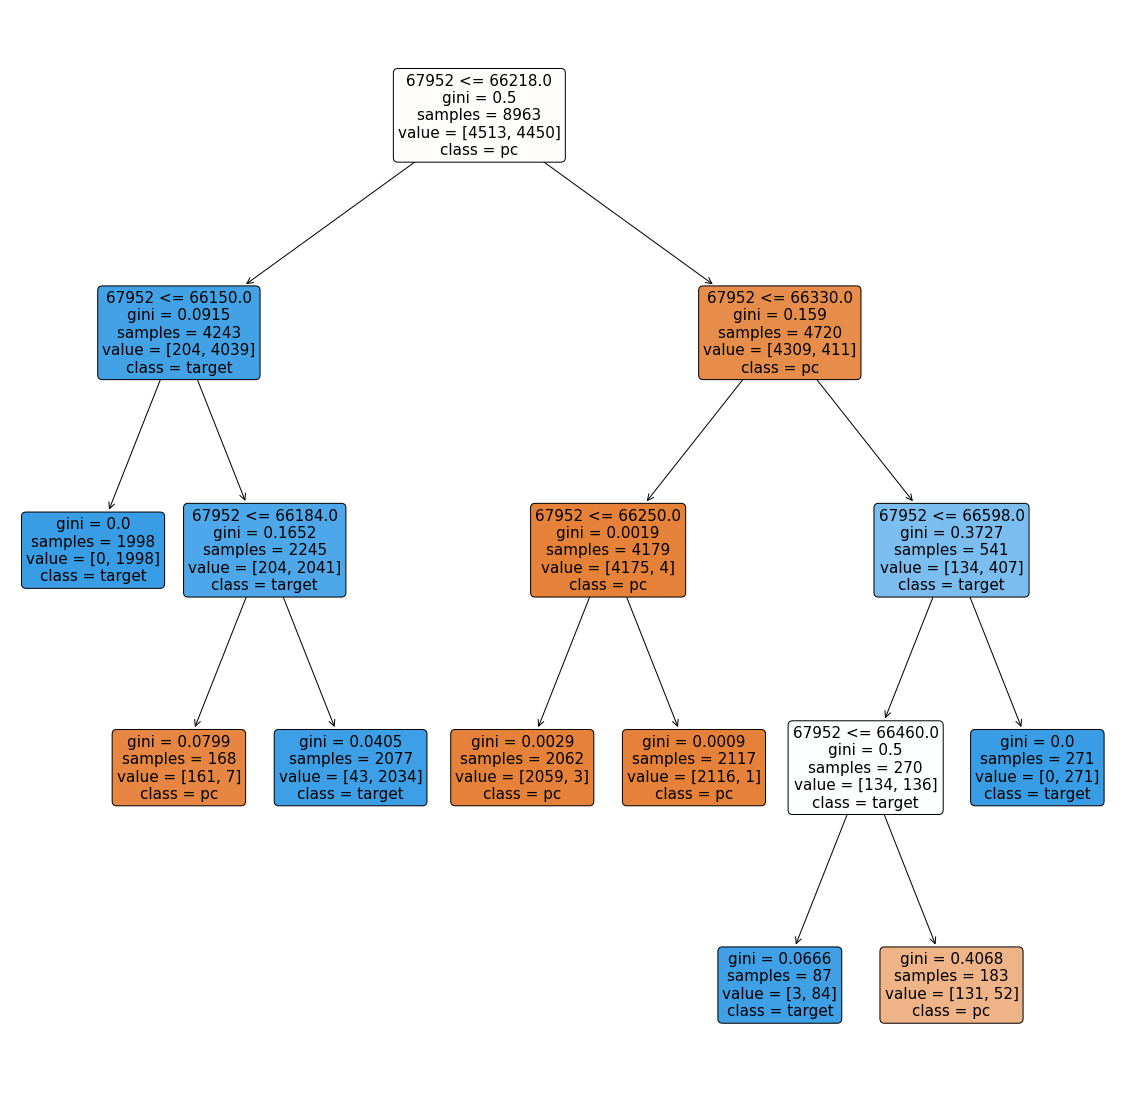

In [9]:
plt.figure(figsize = (20,20))
decision_tree = plot_tree(decision_tree=decision_tree, feature_names = data_x.columns, 
                     class_names =["pc", "target", "Taken,y or n"] , filled = True , precision = 4, rounded = True)

plt.savefig("decision_tree_dataset3.png")
decision_tree

In [10]:
print("Predicted values:\n",y_pred)

Predicted values:
 [1 0 1 ... 0 0 0]


In [11]:
decision_tree_2=DecisionTreeClassifier(criterion="entropy",max_depth=3)
desion_tree_2 = decision_tree_2.fit(x_train,y_train)
y_pred_2 = decision_tree_2.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree_2.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree_2.score(x_test,y_test)))

Accurancy on training set: 0.979025
Accurancy on test set: 0.977689


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1079   10]
 [  19 1133]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1089
           1       0.99      0.98      0.99      1152

    accuracy                           0.99      2241
   macro avg       0.99      0.99      0.99      2241
weighted avg       0.99      0.99      0.99      2241

0.9870593485051317
